In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
# directory = "/content/gdrive/MyDrive/BrainTumorDataset"
# directory = "../dataset/original/BrainTumorDataset"

In [3]:
def load_data(directory, extension):
  mat_files = []
  files = os.listdir(directory)
  count_files = 0

  for i, file in enumerate(files, start=1):
    if i % 10 == 0:
      sys.stdout.write('\r[{}/{}] images loaded: {:.1f} %'.format(i, len(files), i / float(len(files)) * 100))
      sys.stdout.flush()
    
    mat_file = h5py.File(os.path.join(directory,file),"r")
    mat_files.append(mat_file)
    count_files += 1

  print('\nTotal files read: ', count_files)
  return mat_files

In [25]:
mat_files = load_data(directory, ".mat")

[3060/3064] images loaded: 99.9 %
Total files read:  3064


In [26]:
first_file = mat_files[0]
print(first_file.keys())
print(first_file['cjdata']['image'])
print(first_file['cjdata']['label'])
print('Label:', int(first_file['cjdata']['label'][()]))

<KeysViewHDF5 ['cjdata']>
<HDF5 dataset "image": shape (512, 512), type "<i2">
<HDF5 dataset "label": shape (1, 1), type "<f8">
Label: 1


In [29]:
def transform_data(mat_files, image_dimension):
  images = []
  labels = []
  for i, mat_file in enumerate(mat_files, start=1):
    image = cv2.resize(mat_file['cjdata']['image'][()], dsize=(image_dimension, image_dimension), 
                       interpolation = cv2.INTER_AREA)
    label = int(mat_file['cjdata']['label'][()]) - 1
    images.append(image)
    labels.append(label)
    sys.stdout.write('\r[{}/{}] images loaded: {:.1f} %'.format(i, len(mat_files), i / float(len(mat_files)) * 100))
    sys.stdout.flush()

  images = np.array(images)
  labels = np.array(labels)
  print('\nimages:', images.shape)
  print('labels:', labels.shape)

  return images, labels   

In [30]:
images, labels = transform_data(mat_files, 128)

[3064/3064] images loaded: 100.0 %
images: (3064, 128, 128)
labels: (3064,)


In [31]:
images[0][60]

array([   0,    0,    0,    0,    0,   23,   40,   47,   47,   49,   50,
         55,   40,   53,   49,   47,  212, 2232, 2023, 1483, 1120, 1117,
       1011,  710,  516,  383,  284,  245,  329,  336,  383,  447,  482,
        593,  506,  470,  502,  573,  581,  546,  551,  425,  248,  163,
        215,  576,  212,  256,  326,  307,  628,  237,  628,  574,  655,
        894,  510, 1117, 1662,  797,  373,  355, 1108, 1167, 1168, 1165,
       1136, 1175, 1191, 1196, 1191, 1220, 1164, 1137, 1188, 1160, 1096,
       1121, 1209, 1133, 1150, 1163, 1147, 1145, 1172, 1177, 1197, 1195,
       1171, 1160, 1123, 1118, 1125, 1090, 1063,  935,  869,  848,  841,
        296,  910,  496,  562,  920,  982, 1245, 2023, 2120, 1954, 1406,
        550,   41,   42,   39,   47,   37,   34,   33,   35,   35,   36,
         36,   34,   29,   34,   23,   10,    1], dtype=int16)

In [32]:
def normalize(image):
    return cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

In [33]:
normalized_images = []

for image in images:
    normalized_images.append(normalize(image))
    
images = np.array(normalized_images)

In [34]:
images[0][60]

array([  0,   0,   0,   0,   0,   2,   3,   4,   4,   4,   4,   4,   3,
         4,   4,   4,  17, 182, 165, 121,  91,  91,  82,  58,  42,  31,
        23,  20,  27,  27,  31,  36,  39,  48,  41,  38,  41,  47,  47,
        44,  45,  35,  20,  13,  17,  47,  17,  21,  27,  25,  51,  19,
        51,  47,  53,  73,  41,  91, 135,  65,  30,  29,  90,  95,  95,
        95,  92,  96,  97,  97,  97,  99,  95,  92,  97,  94,  89,  91,
        98,  92,  94,  95,  93,  93,  95,  96,  97,  97,  95,  94,  91,
        91,  92,  89,  86,  76,  71,  69,  68,  24,  74,  40,  46,  75,
        80, 101, 165, 172, 159, 114,  45,   3,   3,   3,   4,   3,   3,
         3,   3,   3,   3,   3,   3,   2,   3,   2,   1,   0], dtype=int16)

In [36]:
images[0].shape

(128, 128)

**Data Analysis and Visualisation**

number of 0: meningioma: 708
number of 1: glioma: 1426
number of 2: pituitary tumor: 930


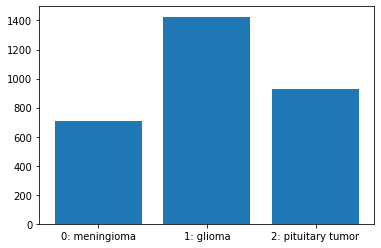

In [38]:
integer_to_class = {'0': '0: meningioma', '1': '1: glioma', '2': '2: pituitary tumor'}
classes, counts = np.unique(labels, return_counts=True)
plt.bar(classes, counts, tick_label=['0: meningioma', '1: glioma', '2: pituitary tumor'])

for i, idx in enumerate(classes):
    print('number of {}: {}'.format(integer_to_class[str(idx)], counts[i]))

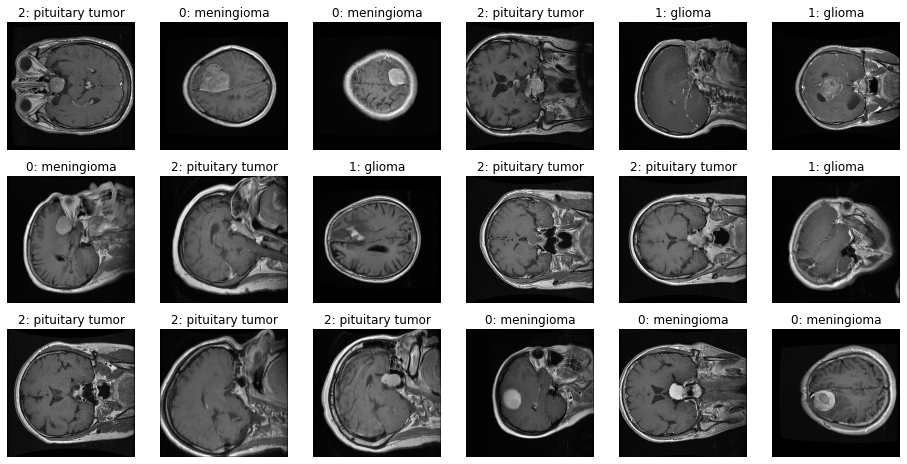

In [39]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(images.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')

**Data Augmentation**

In [100]:
from scipy import ndimage

def rotate_45(image):
    
    return ndimage.rotate(image, 45, reshape = False)

In [101]:
rotated_images = []

for _, image in enumerate(images):
    rotated_images.append(rotate_45(image))

rotated_images = np.array(rotated_images)

(-0.5, 127.5, 127.5, -0.5)

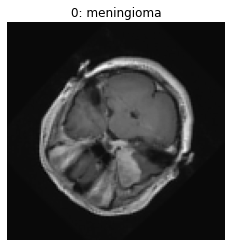

In [102]:
plt.figure(figsize=(8, 4))
plt.imshow(rotated_images[0], cmap='gray')
plt.title(integer_to_class[str(labels[idx])])
plt.axis('off')

In [43]:
import random

def flip_up_down(image):
    
    return np.flipud(image)

In [44]:
flipped_ud_images = []

for image in images:
    flipped_ud_images.append(flip_up_down(image))

flipped_ud_images = np.array(flipped_ud_images)

(-0.5, 127.5, 127.5, -0.5)

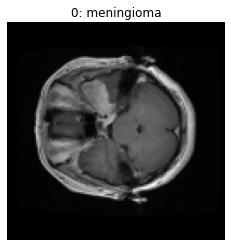

In [45]:
plt.figure(figsize=(8, 4))
plt.imshow(flipped_ud_images[0], cmap='gray')
plt.title(integer_to_class[str(labels[0])])
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

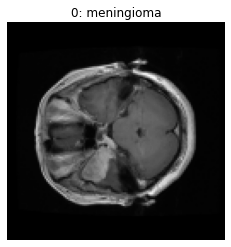

In [46]:
plt.figure(figsize=(8, 4))
plt.imshow(images[0], cmap='gray')
plt.title(integer_to_class[str(labels[0])])
plt.axis('off')

In [47]:
def mirror_left_right(image):
    
    return np.fliplr(image)

In [50]:
mirrored_lr_images = []

for image in images:
    mirrored_lr_images.append(mirror_left_right(image))

mirrored_lr_images = np.array(mirrored_lr_images)

(-0.5, 127.5, 127.5, -0.5)

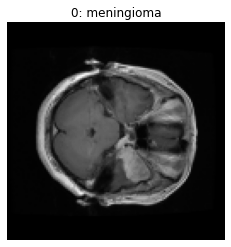

In [51]:
plt.figure(figsize=(8, 4))
plt.imshow(mirrored_lr_images[0], cmap='gray')
plt.title(integer_to_class[str(labels[0])])
plt.axis('off')

In [92]:
def salt_noise(image, prob):
    
    # Add salt noise to image
    # prob: Probability of the noise
    
    output = image.copy()
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            
            rdn = random.random()
            
            if rdn < prob:
                output[i][j] = 255
           
    return output

In [53]:
images[0][25]

array([  0,   0,   0,   0,   0,   0,   1,   3,   3,   3,   3,   4,   3,
         3,   3,   3,   3,   4,   3,   3,   3,   3,   3,   4,   4,   4,
         4,   5,   5,   5,   4,   4,   5,   4,   4,   4,   5,   4,   3,
         3,   3,   4,   4,   4,   5,   5,   7,   7,   7,   8,  13,  22,
        29,  38,  55,  80, 112, 139, 161, 179, 183, 161, 160, 180, 170,
       104,  82,  65,  77,  55,  20,  24,  22,  20,  31,  36,  53,  58,
        28,  10,   8,   7,   5,   6,   8,   8,   7,   5,   4,   4,   4,
         5,   5,   3,   4,   3,   4,   4,   4,   3,   4,   4,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   2,   3,   3,   2,   1,   0,   0], dtype=int16)

In [87]:
noisy_images = []
prob = 0.01

for image in images:
    noisy_images.append(salt_noise(image, prob))

noisy_images = np.array(noisy_images)

In [88]:
noisy_images[0][25]

array([  0,   0,   0,   0,   0,   0,   1,   3,   3,   3,   3,   4,   3,
         3,   3,   3,   3,   4,   3,   3,   3,   3,   3,   4,   4,   4,
         4,   5,   5,   5,   4,   4,   5,   4,   4,   4,   5,   4,   3,
         3,   3,   4,   4,   4,   5,   5,   7,   7,   7,   8,  13,  22,
        29,  38,  55,  80, 112, 139, 161, 179, 183, 161, 160, 180, 170,
       104,  82,  65,  77,  55,  20,  24,  22,  20,  31,  36,  53,  58,
        28,  10,   8,   7,   5,   6,   8,   8,   7,   5,   4,   4,   4,
         5,   5,   3, 255,   3,   4,   4,   4,   3,   4,   4,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   2,   3,   3,   2,   1,   0,   0], dtype=int16)

(-0.5, 127.5, 127.5, -0.5)

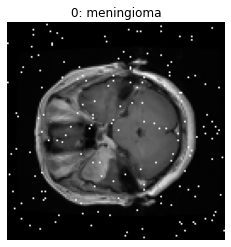

In [109]:
plt.figure(figsize=(8, 4))
plt.imshow(noisy_images[0], cmap='gray')
plt.title(integer_to_class[str(labels[0])])
plt.axis('off')

**Save Images**

In [94]:
labels.shape

(3064,)

In [95]:
labels = np.tile(labels, 5)

In [97]:
labels.shape

(15320,)

In [104]:
all_images = (images, rotated_images, flipped_ud_images, mirrored_lr_images, noisy_images)
all_images = np.concatenate(all_images)

In [105]:
all_images.shape

(15320, 128, 128)

In [1]:
images_path = '../dataset/augmented_images.npz'

In [108]:
np.savez_compressed(images_path, images = all_images, labels = labels)

**Read Images**

In [110]:
with np.load(images_path) as data:
    
  images = data['images']
  labels = data['labels']

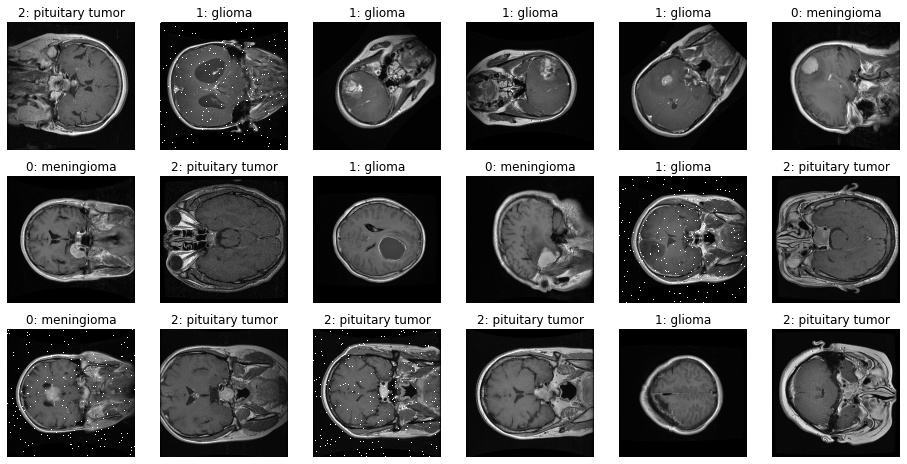

In [111]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(images.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow(images[idx], cmap='gray')
    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')

In [112]:
images.shape

(15320, 128, 128)

In [113]:
labels.shape

(15320,)